## 1. Introducere

### Obiectivul proiectului

- Identificarea factorilor determinanti ai pretului: Analizarea modului in care variabile precum suprafata utila, numarul de camere si zona geografica influenteaza pretul apartamentelor din Iasi

- Evaluarea randamentului pe zone: Compararea pretului mediu pe metru patrat in cartiere diferite, de exemplu: Copou vs Bucium, pentru a identifica zonele cele mai accesibile ca pret.

- Curatarea si modelarea datelor

### Continutul proiectului

- Setul de date: Observatii extrase de pe site-ul Storia prin scraping 

- Analiza exploratorie: Vizualizarea corelatiilor dintre pret si suprafata prin scatter plot-uri si identificarea distributiei preturilor folosind boxplot-uri

- Preprocesare si filtrare: Eliminarea datelor eronate, de exemplu apartamente neobisnuit de ieftine sau cu o dimensiune exagerat de mare

- Concluzii si recomandari: O sinteza a tendintelor actuale din piata imobiliara din Iasi si validarea ipotezelor economice prin metode statistice

## 2. Prezentarea bazei de date

**Structura finala a bazei de date**:

- **Pret (numeric)**: pretul apartamentului, in euro

- **Suprafata_Utila (numeric)**: suprafata apartamentului, in metri patrati

- **Camere (numeric/factor)**: numarul de camere

- **Pret_mp (numeric)**: pretul pe metru patrat, obtinut prin (Pret / Suprafata Utila)

- **Zona (factor)**: o zona din Iasi, de exemplu "Nicolina-CUG", "Bucium", "Alexandru-Dacia"

- **Vechime_Imobil (factor)**: variabila obtina prin transformarea unei variabile numerice intr-o variabila categoriala, cu cel putin 3 categorii: "Vechi (Pre-1977)", "Clasic (1977-2000)", "Nou (Post-2000)"

- **Compartimentare (factor)**: Decomandat, Semidecomandat, Nespecificat


In continuare se va prezenta pas cu pas logica pentru curatarea datelor obtinute prin scraping, impreuna cu diverse proceduri de extractie a datelor, feature engineering, identificare a outlierilor, etc.

In [105]:
import pandas as pd
import re
import numpy as np

In [106]:
df = pd.read_csv('2_imobiliare_iasi_raw.csv')

In [107]:
df.shape

(2927, 5)

In [108]:
df.head(n = 10)

,Titlu,Pret_Raw,Link,Full_Description,Pret_EUR
0,Titlu Necunoscut,72 500 €,https://www.storia.ro/ro/oferta/etaj-1-apartam...,Adăugat astăzi | ... | ... | ... | ... | ... |...,NaN
1,Titlu Necunoscut,154 000 €,https://www.storia.ro/ro/oferta/apartament-de-...,Adăugat astăzi | ... | ... | ... | ... | ... |...,NaN
2,Titlu Necunoscut,180 000 €,https://www.storia.ro/ro/oferta/oportunitate-u...,Adăugat astăzi | ... | ... | ... | ... | ... |...,NaN
3,Titlu Necunoscut,79 000 €,https://www.storia.ro/ro/oferta/podul-de-fier-...,Adăugat astăzi | ... | ... | ... | ... | ... |...,NaN
4,Titlu Necunoscut,62 500 €,https://www.storia.ro/ro/oferta/apartament-1-c...,Adăugat astăzi | ... | ... | ... | ... | ... |...,NaN
5,Titlu Necunoscut,144 900 €,https://www.storia.ro/ro/oferta/centru-podul-d...,Adăugat astăzi | ... | ... | ... | ... | ... |...,NaN
6,Titlu Necunoscut,119 500 €,https://www.storia.ro/ro/oferta/apartament-3-c...,Adăugat acum 2 zile | ... | ... | ... | 1 | /...,NaN
7,Titlu Necunoscut,120 000 €,https://www.storia.ro/ro/oferta/apartament-2-c...,Adăugat astăzi | ... | ... | ... | ... | ... |...,NaN
8,Titlu Necunoscut,87 000 €,https://www.storia.ro/ro/oferta/copou-etajul-1...,Adăugat astăzi | ... | ... | ... | ... | ... |...,NaN
9,Titlu Necunoscut,85 000 €,https://www.storia.ro/ro/oferta/4-camere-spati...,Adăugat astăzi | ... | ... | ... | ... | ... |...,NaN


### OBS:

- In Full_Description se afla tot ce imi trebuie pentru a crea variabilele

- Ca exemplu, o linie din datele extrase:

"Titlu Necunoscut,85 000 €,https://www.storia.ro/ro/oferta/de-vanzare-apartament-3-camere-mircea-cel-batran-IDFThK,"Adăugat astăzi | ... | ... | ... | ... | ... | ... | 1 |  /  | 9 | 85 000 € | 1667 €/m² | DE VANZARE-APARTAMENT 3 CAMERE-MIRCEA CEL BATRAN | Mircea cel Batran, Iasi, Iasi | Numărul de camere | 3 camere | Prețul pe metru pătrat | 51 m² | Etaj | 4 etajul | Vezi descrierea anunțului | Agentia Invest Imobiliare va propune spre vanzare un apartament de 3 camere, modelul semidecomandat, situat la etajul 4 intr-un bloc cu pod ce a fost construit in anul 1979, acesta fiind fara risc sei... | INVEST IMOBILIARE | Agenție imobiliară",
"

- Se poate observa ca am in descriere:

    - Pret apartament (nu ma intereseaza sa il scot din descriere pentru ca l am scos separat ca variabila cand am facut scraping-ul)

    - Pret pe metru patrat (la fel nu ma intereseaza sa il scot pentru ca pot sa il calculez folosind alte doua variabile)

    - Numar camere (ma intereseaza)

    - Suprafata utila (ma intereseaza)

    - Anul constructiei (ma intereseaza, ulterior va fi transformat)

    - Compartimentare (ma intereseaza)

"Full_Description" este preluat de pe pagina principala de apartamente pentru zona Iasi, asadar descrierea nu este **completa**. Ca sa o pot lua intreaga ar fi trebuit sa accesez fiecare anunt in parte si sa extrag fiecare descriere in totalitate, ceea ce ar fi facut scraping-ul mai complicat.s

In [109]:
df['Full_Description'].head(n = 5)

0    Adăugat astăzi | ... | ... | ... | ... | ... |...
1    Adăugat astăzi | ... | ... | ... | ... | ... |...
2    Adăugat astăzi | ... | ... | ... | ... | ... |...
3    Adăugat astăzi | ... | ... | ... | ... | ... |...
4    Adăugat astăzi | ... | ... | ... | ... | ... |...
Name: Full_Description, dtype: object

In [110]:
df["Pret_EUR"].head(n = 10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Pret_EUR, dtype: float64

In [111]:
df["Pret_EUR"].isna().sum()

np.int64(2925)

In [112]:
df.drop(columns="Pret_EUR", axis=1, inplace=True)

In [113]:
df.shape

(2927, 4)

In [114]:
df['Pret_Raw'].tail(n = 10)

2917    123 000 €
2918    150 000 €
2919     78 500 €
2920    520 000 €
2921    110 000 €
2922     59 000 €
2923    127 000 €
2924     90 000 €
2925     76 108 €
2926    103 600 €
Name: Pret_Raw, dtype: object

In [115]:
df['Pret_Raw'].isna().sum()

np.int64(5)

In [116]:
df.duplicated().sum()

np.int64(0)

In [117]:
df.describe()

,Titlu,Pret_Raw,Link,Full_Description
count,2927,2922,2927,2927
unique,1,757,2918,2862
top,Titlu Necunoscut,120 000 €,https://www.storia.ro/ro/oferta/serenis-apartm...,... | ... | ... | ... | ... | ... | 1 | / | ...
freq,2927,65,4,5


In [118]:
type(df['Full_Description'])

pandas.core.series.Series

In [119]:
df['Full_Description'] = df['Full_Description'].str.lstrip("Adăugat astăzi ")

df['Full_Description'] = df['Full_Description'].str.lstrip("| ... |")

In [120]:
df['Full_Description'].tail(n = 20)

2907    1 |  /  | 8 | 85 000 € | 1809 €/m² | Apartamen...
2908    1 |  /  | 17 | 98 900 € | 2060 €/m² | Bucium L...
2909    1 |  /  | 9 | 139 000 € | 2725 €/m² | Apartame...
2910    1 |  /  | 19 | 125 500 € | 1673 €/m² | Apartam...
2911    1 |  /  | 19 | 72 777 € | 1775 €/m² | Direct D...
2912    1 |  /  | 12 | 111 760 € | 1733 €/m² | APARTAM...
2913    1 |  /  | 7 | 113 000 € | 1852 €/m² | Apartame...
2914    1 |  /  | 8 | 46 000 € | 1917 €/m² | Garsonier...
2915    1 |  /  | 7 | 67 500 € | 1985 €/m² | Apartamen...
2916    1 |  /  | 8 | 169 900 € | 1734 €/m² | Apartame...
2917    1 |  /  | 7 | 123 000 € | 1757 €/m² | Apartame...
2918    1 |  /  | 18 | 150 000 € | 3191 €/m² | Apartam...
2919    1 |  /  | 11 | 78 500 € | 1826 €/m² | GRADINA ...
2920    1 |  /  | 19 | 520 000 € | 6341 €/m² | Apartam...
2921    1 |  /  | 8 | 110 000 € | 1833 €/m² | OCAZIE! ...
2922    1 |  /  | 5 | 59 000 € | 1686 €/m² | Apartamen...
2923    1 |  /  | 15 | 127 000 € | 1716 €/m² | Apartam...
2924    1 |  /

In [121]:
df['Full_Description'].to_csv('descriptions.csv', header=False)

### Data extraction

- extragem din descrierea apartamentului:

    - Suprafata utila

    - Numarul de camere

    - Anul constructiei

    - Zona imobilului

In [122]:
def extrage_suprafata(text):
    """Cauta aparitiile (m²|mp|m) si extrage numarul din fata suprafetei
    Extrage suprafata apartamentului

    Args:
        text (string): ..pe metru pătrat | 52 m² | Etaj | 3 etajul ..

    Returns:
        float: Numarul de metri patrati
    """
    match = re.search(r'(\d+(?:\.\d+)?)\s*(?:m²|mp|m)', str(text).lower())
    if match:
        return float(match.group(1))
    return None

def extrage_camere(text):
    """Cauta cifre urmate de camer
    Extrage numarul de camere 

    Args:
        text (string): .. | Numărul de camere | 3 camere | Prețul pe metru pătrat ..

    Returns:
        integer: Numarul de camere al apartamentului
    """
    match = re.search(r'(\d+)\s*camer', str(text).lower())
    if match:
        return int(match.group(1))
    return None

def extrage_an(text):
    """Cauta expresii similare cu "anul 1980", "din 1980", "construit in 1980"
    Validare sa nu fie prea vechi si nici din viitor

    Args:
        text (string): ..bloc cu pod ce a fost construit in anul 1979, acesta fiind fara risc sei...

    Returns:
        integer: Anul constructiei
    """
    match = re.search(r'(?:19|20)\d{2}', str(text))
    if match:
        an = int(match.group(0))
        if an >= 1950 and an <= 2026:
            return an
    return None

def extrage_zona(text):
    """Cauta segmentul care contine "Iasi" si ia ce e inainte de virgula
    "Mircea cel Batran, Iasi, Iasi" -> "Mircea cel Batran"

    Args:
        text (string): "Mircea cel Batran, Iasi, Iasi"

    Returns:
        string: Zona din Iasi, unde este apartamentul, sau Necunoscut
    """
    
    if not isinstance(text, str): return "Necunoscut"
    
    parts = text.split('|')
    for part in parts:
        if 'iasi' in part.lower() and ',' in part:
            zona = part.split(',')[0].strip()
            if len(zona) < 30 and zona.lower() != "iasi":
                return zona
    return "Iasi (General)"

In [123]:
df.head(n = 10)

,Titlu,Pret_Raw,Link,Full_Description
0,Titlu Necunoscut,72 500 €,https://www.storia.ro/ro/oferta/etaj-1-apartam...,1 | / | 8 | 72 500 € | 1768 €/m² | Etaj 1 Ap...
1,Titlu Necunoscut,154 000 €,https://www.storia.ro/ro/oferta/apartament-de-...,1 | / | 12 | 154 000 € | 2567 €/m² | Apartam...
2,Titlu Necunoscut,180 000 €,https://www.storia.ro/ro/oferta/oportunitate-u...,1 | / | 8 | 180 000 € | 2486 €/m² | Oportuni...
3,Titlu Necunoscut,79 000 €,https://www.storia.ro/ro/oferta/podul-de-fier-...,1 | / | 12 | 79 000 € | 1463 €/m² | Podul de...
4,Titlu Necunoscut,62 500 €,https://www.storia.ro/ro/oferta/apartament-1-c...,1 | / | 9 | 62 500 € | 1786 €/m² | Apartamen...
5,Titlu Necunoscut,144 900 €,https://www.storia.ro/ro/oferta/centru-podul-d...,1 | / | 14 | 144 900 € | 1985 €/m² | Centru ...
6,Titlu Necunoscut,119 500 €,https://www.storia.ro/ro/oferta/apartament-3-c...,cum 2 zile | ... | ... | ... | 1 | / | 6 | 1...
7,Titlu Necunoscut,120 000 €,https://www.storia.ro/ro/oferta/apartament-2-c...,1 | / | 21 | 120 000 € | 2590 €/m² | Apartam...
8,Titlu Necunoscut,87 000 €,https://www.storia.ro/ro/oferta/copou-etajul-1...,1 | / | 8 | 87 000 € | 2719 €/m² | Copou-Eta...
9,Titlu Necunoscut,85 000 €,https://www.storia.ro/ro/oferta/4-camere-spati...,1 | / | 19 | 85 000 € | 905 €/m² | 4 camere ...


In [124]:
df.drop(columns=["Titlu", "Link"], inplace=True)

In [125]:
df.head(n = 10)

,Pret_Raw,Full_Description
0,72 500 €,1 | / | 8 | 72 500 € | 1768 €/m² | Etaj 1 Ap...
1,154 000 €,1 | / | 12 | 154 000 € | 2567 €/m² | Apartam...
2,180 000 €,1 | / | 8 | 180 000 € | 2486 €/m² | Oportuni...
3,79 000 €,1 | / | 12 | 79 000 € | 1463 €/m² | Podul de...
4,62 500 €,1 | / | 9 | 62 500 € | 1786 €/m² | Apartamen...
5,144 900 €,1 | / | 14 | 144 900 € | 1985 €/m² | Centru ...
6,119 500 €,cum 2 zile | ... | ... | ... | 1 | / | 6 | 1...
7,120 000 €,1 | / | 21 | 120 000 € | 2590 €/m² | Apartam...
8,87 000 €,1 | / | 8 | 87 000 € | 2719 €/m² | Copou-Eta...
9,85 000 €,1 | / | 19 | 85 000 € | 905 €/m² | 4 camere ...


In [126]:
df['Suprafata_Utila'] = df['Full_Description'].apply(extrage_suprafata)
df['Nr_Camere'] = df['Full_Description'].apply(extrage_camere)
df['An_Constructie'] = df['Full_Description'].apply(extrage_an)
df['Zona'] = df['Full_Description'].apply(extrage_zona)

In [127]:
df.head(n = 10)

,Pret_Raw,Full_Description,Suprafata_Utila,Nr_Camere,An_Constructie,Zona
0,72 500 €,1 | / | 8 | 72 500 € | 1768 €/m² | Etaj 1 Ap...,41.00,1.0,2019.0,CUG
1,154 000 €,1 | / | 12 | 154 000 € | 2567 €/m² | Apartam...,60.00,3.0,NaN,Pacurari
2,180 000 €,1 | / | 8 | 180 000 € | 2486 €/m² | Oportuni...,72.40,3.0,2001.0,Strada Academiei
3,79 000 €,1 | / | 12 | 79 000 € | 1463 €/m² | Podul de...,54.00,2.0,NaN,Strada Cucu
4,62 500 €,1 | / | 9 | 62 500 € | 1786 €/m² | Apartamen...,35.00,1.0,1978.0,Iasi (General)
5,144 900 €,1 | / | 14 | 144 900 € | 1985 €/m² | Centru ...,73.00,2.0,1985.0,Podu de Fier
6,119 500 €,cum 2 zile | ... | ... | ... | 1 | / | 6 | 1...,150.00,3.0,1959.0,CUG
7,120 000 €,1 | / | 21 | 120 000 € | 2590 €/m² | Apartam...,46.34,2.0,NaN,Stradela Moara de Vant
8,87 000 €,1 | / | 8 | 87 000 € | 2719 €/m² | Copou-Eta...,32.00,2.0,NaN,Copou
9,85 000 €,1 | / | 19 | 85 000 € | 905 €/m² | 4 camere ...,93.93,4.0,2001.0,Strada Vasile Lupu


In [130]:
print(f"NaN:{df['An_Constructie'].isna().sum()} - Valori totale {df.shape[0]}")

NaN:2064 - Valori totale 2927


In [133]:
df.shape[0]

2927

In [135]:
df.dropna(subset=["Pret_Raw", "An_Constructie"], axis=0, inplace=True)

In [136]:
df.shape[0]

863

### OBS:

- Foarte multe observatii au valori lipsa la anul constructiei, dar tinand cont de numarul de date (2927 de inregistrari) ne permitem sa eliminam valorile lipsa si sa ramanem cu 863 de observatii.

In [137]:
df.head(n = 10)

,Pret_Raw,Full_Description,Suprafata_Utila,Nr_Camere,An_Constructie,Zona
0,72 500 €,1 | / | 8 | 72 500 € | 1768 €/m² | Etaj 1 Ap...,41.00,1.0,2019.0,CUG
2,180 000 €,1 | / | 8 | 180 000 € | 2486 €/m² | Oportuni...,72.40,3.0,2001.0,Strada Academiei
4,62 500 €,1 | / | 9 | 62 500 € | 1786 €/m² | Apartamen...,35.00,1.0,1978.0,Iasi (General)
5,144 900 €,1 | / | 14 | 144 900 € | 1985 €/m² | Centru ...,73.00,2.0,1985.0,Podu de Fier
6,119 500 €,cum 2 zile | ... | ... | ... | 1 | / | 6 | 1...,150.00,3.0,1959.0,CUG
9,85 000 €,1 | / | 19 | 85 000 € | 905 €/m² | 4 camere ...,93.93,4.0,2001.0,Strada Vasile Lupu
11,106 000 €,1 | / | 6 | 106 000 € | 2120 €/m² | Apartame...,50.00,2.0,2015.0,Nicolina 1
12,73 500 €,1 | / | 10 | 73 500 € | 1289 €/m² | Tatarasi...,57.00,2.0,1972.0,Tatarasi Nord
16,97 500 €,1 | / | 12 | 97 500 € | 2120 €/m² | Podul de...,46.00,2.0,1982.0,Strada Conductelor
17,105 000 €,1 | / | 8 | 105 000 € | 1313 €/m² | Apartame...,80.00,3.0,2016.0,Bucium


In [138]:
df.to_csv("2_description.csv", header=True)

In [139]:
df.columns

Index(['Pret_Raw', 'Full_Description', 'Suprafata_Utila', 'Nr_Camere',
       'An_Constructie', 'Zona'],
      dtype='object')

### OBS:

- Din moment ce am extras informatiile de care avem nevoie, incepem sa ne ocupam de fiecare variabila in parte:

    - Pret_Raw: este de tip 'object' -> Vrem sa fie numeric, deci sa scapam de '€' si sa facem conversie 

In [152]:
df["Pret_Raw"] = df["Pret_Raw"].astype(str).str.replace('€', '', regex=False)

In [153]:
df["Pret_Raw"].head(n = 10)

0      72 500 
2     180 000 
4      62 500 
5     144 900 
6     119 500 
9      85 000 
11    106 000 
12     73 500 
16     97 500 
17    105 000 
Name: Pret_Raw, dtype: object

In [154]:
df['Pret_Raw'] = df['Pret_Raw'].str.replace(r'\s+|[^\d]', '', regex=True)

In [155]:
df["Pret_Raw"].head(n = 10)

0      72500
2     180000
4      62500
5     144900
6     119500
9      85000
11    106000
12     73500
16     97500
17    105000
Name: Pret_Raw, dtype: object

In [156]:
df['Pret_Raw'] = pd.to_numeric(df['Pret_Raw'], errors='coerce')

In [157]:
df["Pret_Raw"].head(n = 5)

0     72500
2    180000
4     62500
5    144900
6    119500
Name: Pret_Raw, dtype: int64

In [158]:
df["Suprafata_Utila"].head(n = 5)

0     41.0
2     72.4
4     35.0
5     73.0
6    150.0
Name: Suprafata_Utila, dtype: float64

### Feature Engingeering

- **Pret_mp**: variabila obtinuta combinand Pret_Raw si Suprafata_Utila

- **Vechime_Imobil**: transformare in variabila categoriala, cu 3 praguri: Vechi, Clasic, Nou

- **Zona**: zonele extrase din Full_Description sunt foarte diverse si trebuie sa fie grupate pe zone mai generale precum "Nicolina-CUG", "Galata-Frumoasa"

In [160]:
df["Pret_mp"] = df["Pret_Raw"] / df["Suprafata_Utila"]

In [161]:
df.head(n = 10)

,Pret_Raw,Full_Description,Suprafata_Utila,Nr_Camere,An_Constructie,Zona,Pret_mp
0,72500,1 | / | 8 | 72 500 € | 1768 €/m² | Etaj 1 Ap...,41.00,1.0,2019.0,CUG,1768.292683
2,180000,1 | / | 8 | 180 000 € | 2486 €/m² | Oportuni...,72.40,3.0,2001.0,Strada Academiei,2486.187845
4,62500,1 | / | 9 | 62 500 € | 1786 €/m² | Apartamen...,35.00,1.0,1978.0,Iasi (General),1785.714286
5,144900,1 | / | 14 | 144 900 € | 1985 €/m² | Centru ...,73.00,2.0,1985.0,Podu de Fier,1984.931507
6,119500,cum 2 zile | ... | ... | ... | 1 | / | 6 | 1...,150.00,3.0,1959.0,CUG,796.666667
9,85000,1 | / | 19 | 85 000 € | 905 €/m² | 4 camere ...,93.93,4.0,2001.0,Strada Vasile Lupu,904.929203
11,106000,1 | / | 6 | 106 000 € | 2120 €/m² | Apartame...,50.00,2.0,2015.0,Nicolina 1,2120.000000
12,73500,1 | / | 10 | 73 500 € | 1289 €/m² | Tatarasi...,57.00,2.0,1972.0,Tatarasi Nord,1289.473684
16,97500,1 | / | 12 | 97 500 € | 2120 €/m² | Podul de...,46.00,2.0,1982.0,Strada Conductelor,2119.565217
17,105000,1 | / | 8 | 105 000 € | 1313 €/m² | Apartame...,80.00,3.0,2016.0,Bucium,1312.500000


In [163]:
df["Pret_mp"] = df["Pret_mp"].round(2)

In [164]:
df.head(n = 5)

,Pret_Raw,Full_Description,Suprafata_Utila,Nr_Camere,An_Constructie,Zona,Pret_mp
0,72500,1 | / | 8 | 72 500 € | 1768 €/m² | Etaj 1 Ap...,41.0,1.0,2019.0,CUG,1768.29
2,180000,1 | / | 8 | 180 000 € | 2486 €/m² | Oportuni...,72.4,3.0,2001.0,Strada Academiei,2486.19
4,62500,1 | / | 9 | 62 500 € | 1786 €/m² | Apartamen...,35.0,1.0,1978.0,Iasi (General),1785.71
5,144900,1 | / | 14 | 144 900 € | 1985 €/m² | Centru ...,73.0,2.0,1985.0,Podu de Fier,1984.93
6,119500,cum 2 zile | ... | ... | ... | 1 | / | 6 | 1...,150.0,3.0,1959.0,CUG,796.67


In [165]:
df['Nr_Camere'].head(n = 2)

0    1.0
2    3.0
Name: Nr_Camere, dtype: float64

In [166]:
df['Nr_Camere'].value_counts()

Nr_Camere
2.0    397
3.0    258
1.0    158
4.0     47
7.0      2
5.0      1
Name: count, dtype: int64

In [167]:
df['An_Constructie'].isna().sum()

np.int64(0)

In [168]:
df['Nr_Camere'].isna().sum()

np.int64(0)

In [170]:
df['An_Constructie'] = df['An_Constructie'].astype('int64')

In [171]:
df['Nr_Camere'] = df['Nr_Camere'].astype('int64')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 0 to 2926
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pret_Raw          863 non-null    int64  
 1   Full_Description  863 non-null    object 
 2   Suprafata_Utila   863 non-null    float64
 3   Nr_Camere         863 non-null    int64  
 4   An_Constructie    863 non-null    int64  
 5   Zona              863 non-null    object 
 6   Pret_mp           863 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 86.2+ KB


In [173]:
df['Zona'].head(n = 10)

0                    CUG
2       Strada Academiei
4         Iasi (General)
5           Podu de Fier
6                    CUG
9     Strada Vasile Lupu
11            Nicolina 1
12         Tatarasi Nord
16    Strada Conductelor
17                Bucium
Name: Zona, dtype: object

In [175]:
x = [i < 5 for i in df['Zona'].value_counts()]

In [180]:
x.count(True)

60

### OBS:

- Din analiza de mai sus rezulta ca avem 60 de inregistrari unde numarul de aparitii este mai mic de 5 la zona.

Un sample din fisierul cu zone:

**Zona, count**

- Apartament 2 camere,1
- Soseaua Arcu,1
- Strada Fantanilor,1
- De vanzare 2 camere,1
- Strada Duca Voda,1
- Strada Hlincea,1
- Stradela Uzinei,1
- Strada Smardan,1
- Garsoniera de vanzare,1
- Strada Agronomilor,1
- Soseaua Pacurari,1
- Dancu,1

Se poate observa ca sunt multe strazi si zone specifice care pot fi incadrate in zone mai generale.

De asemenea se poate vedea ca sunt si multe inregistrari useless, cum ar fi "De vanzare 2 camere,1", "Apartament 2 camere,1". Inregistrarile de genul vor avea setat un flag "Gunoi" ca sa fie eliminate ulterior.

In [189]:
df["Zona"].value_counts().to_csv("zona_iasi.csv")

In [190]:
mapping_zone = {
    'Nicolina-CUG': ['Nicolina 1', 'Nicolina 2', 'CUG', 'Hlincea', 'Tudor Neculai', 'Soseaua Nicolina', 'Poitiers', 'Manta Rosie'],
    'Centru-Civic': ['Centru', 'Palas', 'Independentei', 'Academiei', 'Ion Creanga', 'Carol I', 'Anastasie Panu', 'Cuza Voda', 'Arcu', 'Smardan', 'Podu de Fier'],
    'Podu-Ros-Cantemir': ['Podu Ros', 'Cantemir', 'Tesatura'],
    'Tatarasi-Tudor': ['Tatarasi Sud', 'Tatarasi Nord', 'Vasile Lupu', 'Oancea', 'Tudor Vladimirescu', 'Baza 3'],
    'Pacurari-Canta': ['Pacurari', 'Canta', 'Moara de Foc'],
    'Copou-Saras': ['Copou', 'Agronomie', 'Sadoveanu', 'Agronomilor', 'Moara de Vant', 'Ticau'],
    'Alexandru-Dacia': ['Alexandru Cel Bun', 'Dacia', 'Mircea cel Batran', 'Bularga', 'Decebal'],
    'Bucium': ['Bucium', 'Visan', 'Barnova'],
    'Galata-Frumoasa': ['Galata', 'Frumoasa', 'Ciurea', 'Bisericii'],
    'Periferie-Metropolitana': ['Miroslava', 'Rediu', 'Dancu', 'Aroneanu', 'Valea Lupului', 'Voinesti']
}

def clean_location(x):
    x = str(x)
    for categoria, cuvinte_cheie in mapping_zone.items():
        for cuvant in cuvinte_cheie:
            if cuvant.lower() in x.lower():
                return categoria
    return "gunoi"

In [192]:
df['Zona_Finala'] = df['Zona'].apply(clean_location)

In [194]:
df['Zona_Finala'].value_counts().to_csv("final_zona_iasi.csv")

In [198]:
df = df[df['Zona_Finala'] != "gunoi"]

In [199]:
df['Zona_Finala'].value_counts()

Zona_Finala
Nicolina-CUG               211
Centru-Civic                94
Alexandru-Dacia             90
Tatarasi-Tudor              89
Podu-Ros-Cantemir           83
Pacurari-Canta              71
Galata-Frumoasa             48
Bucium                      37
Copou-Saras                 37
Periferie-Metropolitana     16
Name: count, dtype: int64

In [201]:
df.shape

(776, 8)

In [203]:
df.head(n = 20)

,Pret_Raw,Full_Description,Suprafata_Utila,Nr_Camere,An_Constructie,Zona,Pret_mp,Zona_Finala
0,72500,1 | / | 8 | 72 500 € | 1768 €/m² | Etaj 1 Ap...,41.00,1,2019,CUG,1768.29,Nicolina-CUG
2,180000,1 | / | 8 | 180 000 € | 2486 €/m² | Oportuni...,72.40,3,2001,Strada Academiei,2486.19,Centru-Civic
5,144900,1 | / | 14 | 144 900 € | 1985 €/m² | Centru ...,73.00,2,1985,Podu de Fier,1984.93,Centru-Civic
6,119500,cum 2 zile | ... | ... | ... | 1 | / | 6 | 1...,150.00,3,1959,CUG,796.67,Nicolina-CUG
9,85000,1 | / | 19 | 85 000 € | 905 €/m² | 4 camere ...,93.93,4,2001,Strada Vasile Lupu,904.93,Tatarasi-Tudor
11,106000,1 | / | 6 | 106 000 € | 2120 €/m² | Apartame...,50.00,2,2015,Nicolina 1,2120.00,Nicolina-CUG
12,73500,1 | / | 10 | 73 500 € | 1289 €/m² | Tatarasi...,57.00,2,1972,Tatarasi Nord,1289.47,Tatarasi-Tudor
17,105000,1 | / | 8 | 105 000 € | 1313 €/m² | Apartame...,80.00,3,2016,Bucium,1312.50,Bucium
21,72000,1 | / | 10 | 72 000 € | 1800 €/m² | Apartame...,40.00,1,2016,Bucium,1800.00,Bucium
22,101916,1 | / | 4 | 101 916 € | 1800 €/m² | INVESTIT...,900.00,2,2026,Strada Visan,113.24,Bucium


Transformarea variabilei numerice intr-una categoriala:

In [207]:
def categorize_age(an):
    if an < 1977:
        return "Vechi (Pre-1977)"
    elif 1977 <= an <= 2000:
        return "Clasic (1977-2000)"
    else:
        return "Nou (Post-2000)"

df['Vechime_Imobil'] = df['An_Constructie'].apply(categorize_age)

In [209]:
df['Vechime_Imobil'].value_counts()

Vechime_Imobil
Clasic (1977-2000)    350
Nou (Post-2000)       298
Vechi (Pre-1977)      128
Name: count, dtype: int64

In [210]:
df.head(n = 10)

,Pret_Raw,Full_Description,Suprafata_Utila,Nr_Camere,An_Constructie,Zona,Pret_mp,Zona_Finala,Vechime_Imobil
0,72500,1 | / | 8 | 72 500 € | 1768 €/m² | Etaj 1 Ap...,41.00,1,2019,CUG,1768.29,Nicolina-CUG,Nou (Post-2000)
2,180000,1 | / | 8 | 180 000 € | 2486 €/m² | Oportuni...,72.40,3,2001,Strada Academiei,2486.19,Centru-Civic,Nou (Post-2000)
5,144900,1 | / | 14 | 144 900 € | 1985 €/m² | Centru ...,73.00,2,1985,Podu de Fier,1984.93,Centru-Civic,Clasic (1977-2000)
6,119500,cum 2 zile | ... | ... | ... | 1 | / | 6 | 1...,150.00,3,1959,CUG,796.67,Nicolina-CUG,Vechi (Pre-1977)
9,85000,1 | / | 19 | 85 000 € | 905 €/m² | 4 camere ...,93.93,4,2001,Strada Vasile Lupu,904.93,Tatarasi-Tudor,Nou (Post-2000)
11,106000,1 | / | 6 | 106 000 € | 2120 €/m² | Apartame...,50.00,2,2015,Nicolina 1,2120.00,Nicolina-CUG,Nou (Post-2000)
12,73500,1 | / | 10 | 73 500 € | 1289 €/m² | Tatarasi...,57.00,2,1972,Tatarasi Nord,1289.47,Tatarasi-Tudor,Vechi (Pre-1977)
17,105000,1 | / | 8 | 105 000 € | 1313 €/m² | Apartame...,80.00,3,2016,Bucium,1312.50,Bucium,Nou (Post-2000)
21,72000,1 | / | 10 | 72 000 € | 1800 €/m² | Apartame...,40.00,1,2016,Bucium,1800.00,Bucium,Nou (Post-2000)
22,101916,1 | / | 4 | 101 916 € | 1800 €/m² | INVESTIT...,900.00,2,2026,Strada Visan,113.24,Bucium,Nou (Post-2000)


In [212]:
df.columns

Index(['Pret_Raw', 'Full_Description', 'Suprafata_Utila', 'Nr_Camere',
       'An_Constructie', 'Zona', 'Pret_mp', 'Zona_Finala', 'Vechime_Imobil'],
      dtype='object')

Extragem din descriere ce tine de compartimentare, pentru a avea o variabila in plus

In [213]:
def extract_type(text):
    text = str(text).lower()
    if 'semidecomandat' in text:
        return 'Semidecomandat'
    elif 'decomandat' in text:
        return 'Decomandat'
    elif 'nedecomandat' in text or 'circular' in text:
        return 'Nedecomandat'
    else:
        return 'Nespecificat'

df['Compartimentare'] = df['Full_Description'].apply(extract_type)

In [215]:
df['Compartimentare'].isna().sum()

np.int64(0)

In [216]:
df['Compartimentare'].value_counts()

Compartimentare
Decomandat        395
Nespecificat      328
Semidecomandat     53
Name: count, dtype: int64

In [221]:
df.columns

Index(['Pret_Raw', 'Full_Description', 'Suprafata_Utila', 'Nr_Camere',
       'An_Constructie', 'Zona', 'Pret_mp', 'Zona_Finala', 'Vechime_Imobil',
       'Compartimentare'],
      dtype='object')

Pastram doar ce ne intereseaza:

In [237]:
df.drop(columns=["Full_Description", "An_Constructie", "Zona"], axis=1, inplace=True)

In [238]:
df.head(n = 10)

,Pret_Raw,Suprafata_Utila,Nr_Camere,Pret_mp,Zona_Finala,Vechime_Imobil,Compartimentare
0,72500,41.00,1,1768.29,Nicolina-CUG,Nou (Post-2000),Decomandat
2,180000,72.40,3,2486.19,Centru-Civic,Nou (Post-2000),Decomandat
5,144900,73.00,2,1984.93,Centru-Civic,Clasic (1977-2000),Decomandat
6,119500,150.00,3,796.67,Nicolina-CUG,Vechi (Pre-1977),Nespecificat
9,85000,93.93,4,904.93,Tatarasi-Tudor,Nou (Post-2000),Semidecomandat
11,106000,50.00,2,2120.00,Nicolina-CUG,Nou (Post-2000),Decomandat
12,73500,57.00,2,1289.47,Tatarasi-Tudor,Vechi (Pre-1977),Semidecomandat
17,105000,80.00,3,1312.50,Bucium,Nou (Post-2000),Nespecificat
21,72000,40.00,1,1800.00,Bucium,Nou (Post-2000),Nespecificat
22,101916,900.00,2,113.24,Bucium,Nou (Post-2000),Nespecificat


In [241]:
df = df.rename(columns={'Pret_Raw': 'Pret', 'Nr_Camere': 'Camere', 'Zona_Finala': 'Zona'})

In [242]:
df.head(n = 10)

,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare
0,72500,41.00,1,1768.29,Nicolina-CUG,Nou (Post-2000),Decomandat
2,180000,72.40,3,2486.19,Centru-Civic,Nou (Post-2000),Decomandat
5,144900,73.00,2,1984.93,Centru-Civic,Clasic (1977-2000),Decomandat
6,119500,150.00,3,796.67,Nicolina-CUG,Vechi (Pre-1977),Nespecificat
9,85000,93.93,4,904.93,Tatarasi-Tudor,Nou (Post-2000),Semidecomandat
11,106000,50.00,2,2120.00,Nicolina-CUG,Nou (Post-2000),Decomandat
12,73500,57.00,2,1289.47,Tatarasi-Tudor,Vechi (Pre-1977),Semidecomandat
17,105000,80.00,3,1312.50,Bucium,Nou (Post-2000),Nespecificat
21,72000,40.00,1,1800.00,Bucium,Nou (Post-2000),Nespecificat
22,101916,900.00,2,113.24,Bucium,Nou (Post-2000),Nespecificat


In [245]:
df.dtypes

Pret                 int64
Suprafata_Utila    float64
Camere               int64
Pret_mp            float64
Zona                object
Vechime_Imobil      object
Compartimentare     object
dtype: object

Eliminam duplicatele

In [247]:
df.duplicated().sum()

np.int64(107)

In [249]:
df = df.drop_duplicates()

In [250]:
df.shape

(669, 7)

In [252]:
df.head(n = 10)

,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare
0,72500,41.00,1,1768.29,Nicolina-CUG,Nou (Post-2000),Decomandat
2,180000,72.40,3,2486.19,Centru-Civic,Nou (Post-2000),Decomandat
5,144900,73.00,2,1984.93,Centru-Civic,Clasic (1977-2000),Decomandat
6,119500,150.00,3,796.67,Nicolina-CUG,Vechi (Pre-1977),Nespecificat
9,85000,93.93,4,904.93,Tatarasi-Tudor,Nou (Post-2000),Semidecomandat
11,106000,50.00,2,2120.00,Nicolina-CUG,Nou (Post-2000),Decomandat
12,73500,57.00,2,1289.47,Tatarasi-Tudor,Vechi (Pre-1977),Semidecomandat
17,105000,80.00,3,1312.50,Bucium,Nou (Post-2000),Nespecificat
21,72000,40.00,1,1800.00,Bucium,Nou (Post-2000),Nespecificat
22,101916,900.00,2,113.24,Bucium,Nou (Post-2000),Nespecificat


### Identificare Outlieri

In [254]:
import matplotlib.pyplot as plt

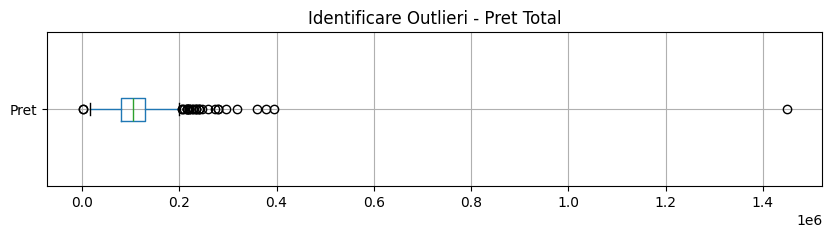

In [256]:
df.boxplot(column=['Pret'], vert=False, figsize=(10,2))
plt.title('Identificare Outlieri - Pret Total')
plt.show()

In [258]:
print(f"{df['Pret'].max()} - max, {df['Pret'].mean()} - mean")

1450000 - max, 112635.53064275037 - mean


In [260]:
df[df['Pret'] == df['Pret'].max()]

,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare
741,1450000,70.0,2,20714.29,Centru-Civic,Clasic (1977-2000),Nespecificat


### OBS:

- pret de 1.450.000, sigur este o eroare pentru ca suprafata utila este doar de 70 mp. Ar veni undeva la 20.714 euro pe mp

In [263]:
df.shape

(669, 7)

### Interquartile Range

In [264]:
Q1 = df['Pret'].quantile(0.25)
Q3 = df['Pret'].quantile(0.75)

IQR = Q3 - Q1

limita_inf = Q1 - 1.5 * IQR
limita_sup = Q3 + 1.5 * IQR

df = df[(df['Pret'] >= limita_inf) & (df['Pret'] <= limita_sup)]

In [265]:
df.shape

(637, 7)

In [266]:
df.head(n = 10)

,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare
0,72500,41.00,1,1768.29,Nicolina-CUG,Nou (Post-2000),Decomandat
2,180000,72.40,3,2486.19,Centru-Civic,Nou (Post-2000),Decomandat
5,144900,73.00,2,1984.93,Centru-Civic,Clasic (1977-2000),Decomandat
6,119500,150.00,3,796.67,Nicolina-CUG,Vechi (Pre-1977),Nespecificat
9,85000,93.93,4,904.93,Tatarasi-Tudor,Nou (Post-2000),Semidecomandat
11,106000,50.00,2,2120.00,Nicolina-CUG,Nou (Post-2000),Decomandat
12,73500,57.00,2,1289.47,Tatarasi-Tudor,Vechi (Pre-1977),Semidecomandat
17,105000,80.00,3,1312.50,Bucium,Nou (Post-2000),Nespecificat
21,72000,40.00,1,1800.00,Bucium,Nou (Post-2000),Nespecificat
22,101916,900.00,2,113.24,Bucium,Nou (Post-2000),Nespecificat


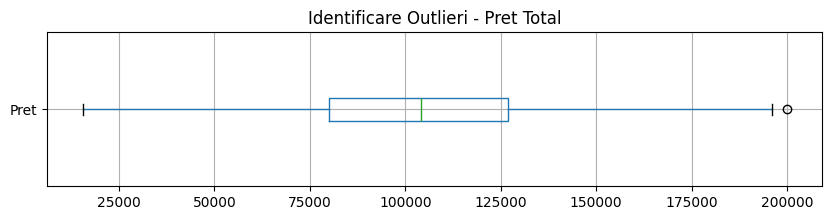

In [267]:
df.boxplot(column=['Pret'], vert=False, figsize=(10,2))
plt.title('Identificare Outlieri - Pret Total')
plt.show()

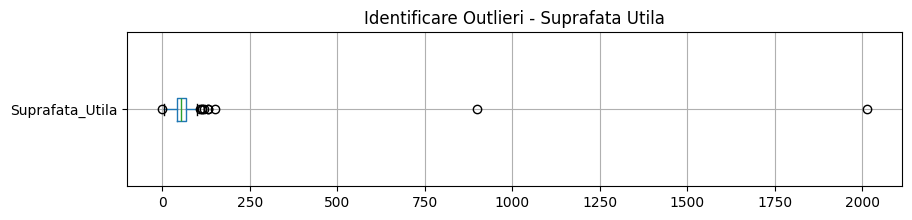

In [268]:
df.boxplot(column=['Suprafata_Utila'], vert=False, figsize=(10,2))
plt.title('Identificare Outlieri - Suprafata Utila')
plt.show()

In [269]:
df.shape

(637, 7)

In [270]:
def IQR_fun(column, df):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    limita_inf = Q1 - 1.5 * IQR
    limita_sup = Q3 + 1.5 * IQR
    
    df = df[(df[column] >= limita_inf) & (df[column] <= limita_sup)]
    
    return df

df = IQR_fun('Suprafata_Utila', df)

In [271]:
df.shape

(627, 7)

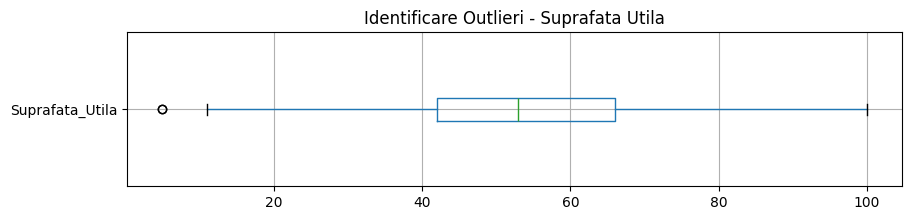

In [272]:
df.boxplot(column=['Suprafata_Utila'], vert=False, figsize=(10,2))
plt.title('Identificare Outlieri - Suprafata Utila')
plt.show()

In [273]:
df.head(n = 2)

,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare
0,72500,41.0,1,1768.29,Nicolina-CUG,Nou (Post-2000),Decomandat
2,180000,72.4,3,2486.19,Centru-Civic,Nou (Post-2000),Decomandat


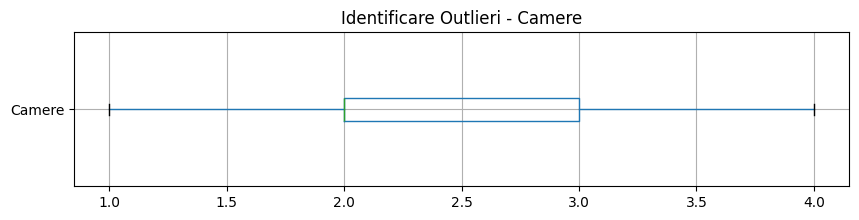

In [274]:
df.boxplot(column=['Camere'], vert=False, figsize=(10, 2))
plt.title('Identificare Outlieri - Camere')
plt.show()

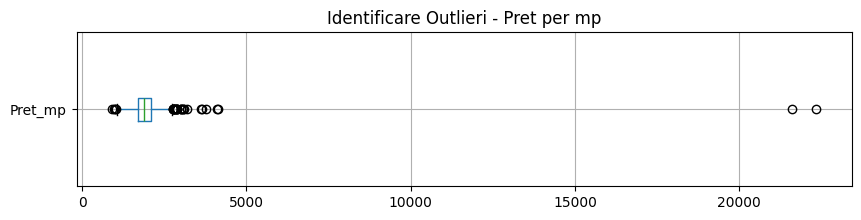

In [275]:
df.boxplot(column=['Pret_mp'], vert=False, figsize=(10, 2))
plt.title('Identificare Outlieri - Pret per mp')
plt.show()

In [276]:
df.shape[0]

627

In [277]:
df = IQR_fun('Pret_mp', df)

In [278]:
df.shape[0]

597

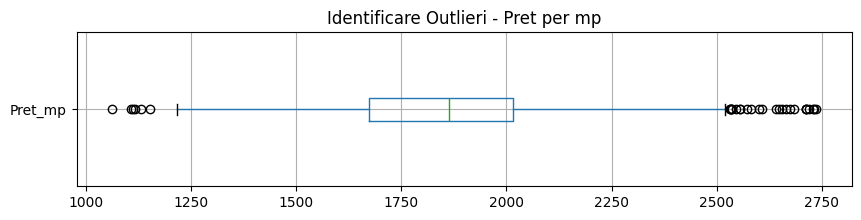

In [279]:
df.boxplot(column=['Pret_mp'], vert=False, figsize=(10, 2))
plt.title('Identificare Outlieri - Pret per mp')
plt.show()

In [280]:
df[df['Pret_mp'] == df['Pret_mp'].max()]

,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare
331,125900,46.0,2,2736.96,Tatarasi-Tudor,Nou (Post-2000),Nespecificat


In [281]:
df.isna().sum()

Pret               0
Suprafata_Utila    0
Camere             0
Pret_mp            0
Zona               0
Vechime_Imobil     0
Compartimentare    0
dtype: int64

In [282]:
df.duplicated().sum()

np.int64(0)

In [284]:
import seaborn as sns

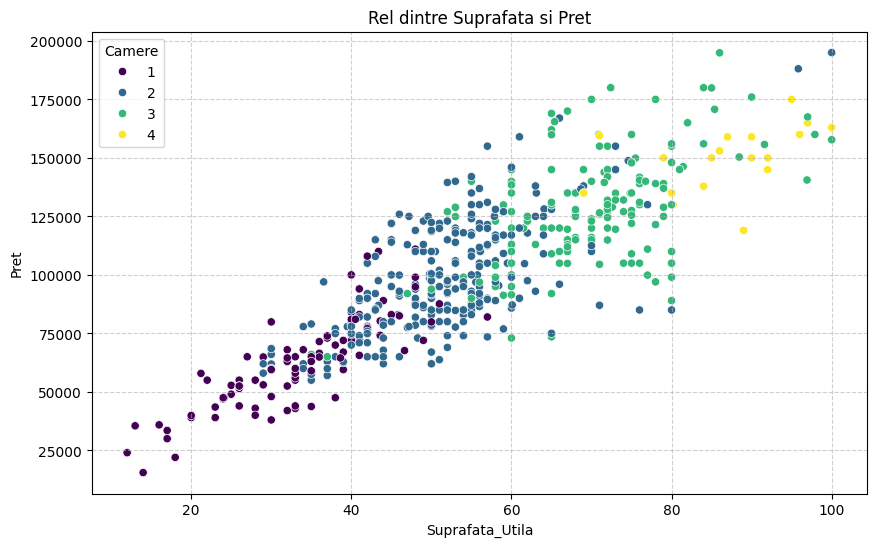

In [289]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Suprafata_Utila', y='Pret', hue='Camere', palette='viridis')
plt.title('Rel dintre Suprafata si Pret')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### OBS:

- Arata destul de bine, dar se pot observa cateva date ce par suspecte, cum ar fi:

    - Apartament de 2 camere la 200 de mii de euro

    - Apartament de 4 camere la sub 130 de mii

    - Apartamente de 3 camere sub 75 de mii

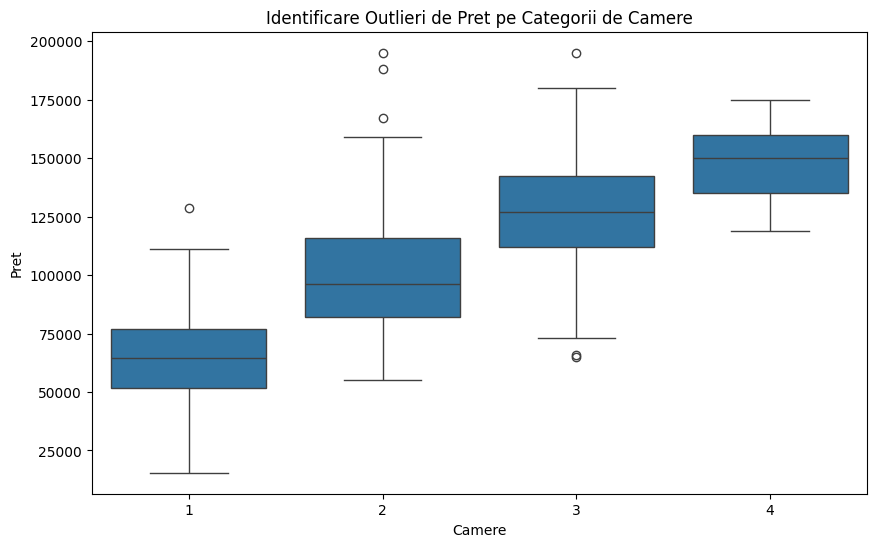

In [288]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Camere', y='Pret')
plt.title('Identificare Outlieri de Pret pe Categorii de Camere')
plt.show()

### Outlieri

- Cautam apartamente mici ca dimensiune, dar neobisnuit de scumpe

    - Suprafata utila mai mica de 40mp, dar un pret mai mare de 75 de mii

- Cautam apartamente mari ca dimensiune, dar neobisnuit de ieftine

    - Suprafata utila mai mare de 80mp, dar un pret mai mic de 130 de mii

In [290]:
df[(df['Suprafata_Utila'] < 40) & (df['Pret'] > 75000)]

,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare
867,97000,36.55,2,2653.90,Tatarasi-Tudor,Nou (Post-2000),Semidecomandat
1422,79000,35.00,2,2257.14,Bucium,Nou (Post-2000),Nespecificat
1511,79900,30.00,1,2663.33,Nicolina-CUG,Nou (Post-2000),Decomandat
1705,76500,38.00,1,2013.16,Nicolina-CUG,Nou (Post-2000),Nespecificat
1925,77900,39.50,2,1972.15,Alexandru-Dacia,Vechi (Pre-1977),Decomandat
2005,77000,38.00,2,2026.32,Pacurari-Canta,Nou (Post-2000),Semidecomandat
2202,77900,34.00,2,2291.18,Alexandru-Dacia,Vechi (Pre-1977),Nespecificat


In [292]:
df[(df['Suprafata_Utila'] > 80) & (df['Pret'] < 130000)]

,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare
587,119000,89.0,4,1337.08,Pacurari-Canta,Nou (Post-2000),Nespecificat


In [294]:
df.shape[0]

597

In [295]:
df = df[~((df['Suprafata_Utila'] < 40) & (df['Pret'] > 75000))]

In [296]:
df.shape[0]

590

In [297]:
df = df[~((df['Suprafata_Utila'] > 80) & (df['Pret'] < 130000))]

In [298]:
df.shape[0]

589

In [291]:
df['Pret_mp'].mean()

np.float64(1889.8701005025125)

In [301]:
import matplotlib.pyplot as plt

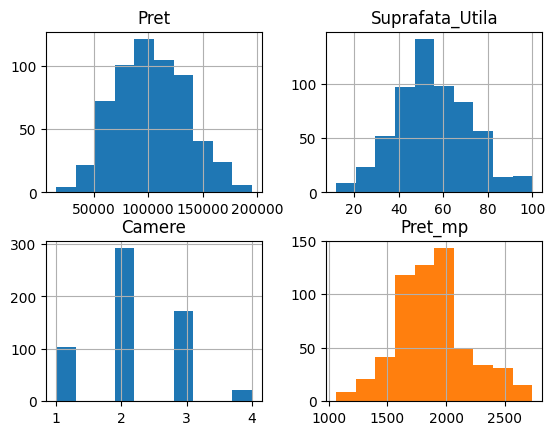

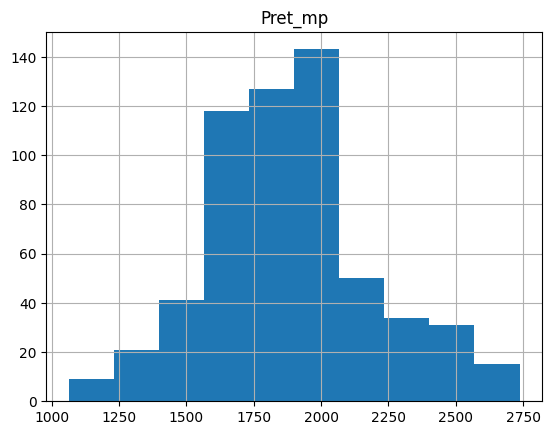

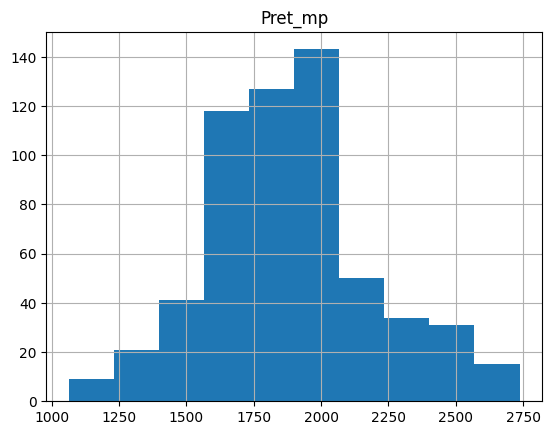

In [305]:
df.hist(column="Pret_mp")
plt.show()

In [300]:
df.to_csv("clean_data.csv", header=True)